# Bibliothèques

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from skimage.filters import threshold_otsu

ModuleNotFoundError: No module named 'skimage'

# Modèle

In [155]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)


X_binarized = np.zeros_like(X)  
for i in range(X.shape[0]):
    thresh = threshold_otsu(X[i])
    X_binarized[i] = (X[i] > thresh).astype(int)

# Réduire les données
def reduce_data(X, y, samples_per_class=700):
    reduced_X = []
    reduced_y = []
    for label in np.unique(y):
        indices = np.where(y == label)[0][:samples_per_class]
        reduced_X.append(X[indices])
        reduced_y.append(y[indices])
    return np.vstack(reduced_X), np.hstack(reduced_y)

X_reduced, y_reduced = reduce_data(X_binarized, y, samples_per_class=700)

print(Counter(y_reduced))


Counter({np.int64(0): 700, np.int64(1): 700, np.int64(2): 700, np.int64(3): 700, np.int64(4): 700, np.int64(5): 700, np.int64(6): 700, np.int64(7): 700, np.int64(8): 700, np.int64(9): 700})


## diviser les données et entrainement du model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

svm_models = []
for i in range(10):
    y_binary = np.where(y_train == i, 1, -1)  # Binariser les labels pour chaque classe
    model = SVC(kernel='rbf', C=1.0, gamma=0.001)
    model.fit(X_train, y_binary)
    svm_models.append(model)
    print(f"Modèle pour la classe {i} entraîné.")

Modèle pour la classe 0 entraîné.
Modèle pour la classe 1 entraîné.
Modèle pour la classe 2 entraîné.
Modèle pour la classe 3 entraîné.
Modèle pour la classe 4 entraîné.
Modèle pour la classe 5 entraîné.
Modèle pour la classe 6 entraîné.
Modèle pour la classe 7 entraîné.
Modèle pour la classe 8 entraîné.
Modèle pour la classe 9 entraîné.


## fonction de prédiction

In [151]:
def predict_ova(models, X):
    decision_values = np.array([model.decision_function(X) for model in models])
    return np.argmax(decision_values, axis=0)

## calcul de précision

In [184]:
y_pred = predict_ova(svm_models, X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur les données de test : {accuracy * 100:.2f}%")

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

Accuracy sur les données de test : 86.93%

Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       153
           1       0.90      0.97      0.93       136
           2       0.87      0.82      0.84       153
           3       0.81      0.83      0.82       126
           4       0.82      0.89      0.86       143
           5       0.86      0.76      0.81       142
           6       0.86      0.96      0.91       130
           7       0.89      0.86      0.88       144
           8       0.91      0.81      0.86       144
           9       0.84      0.84      0.84       129

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.87      0.87      0.87      1400




Matrice de confusion :


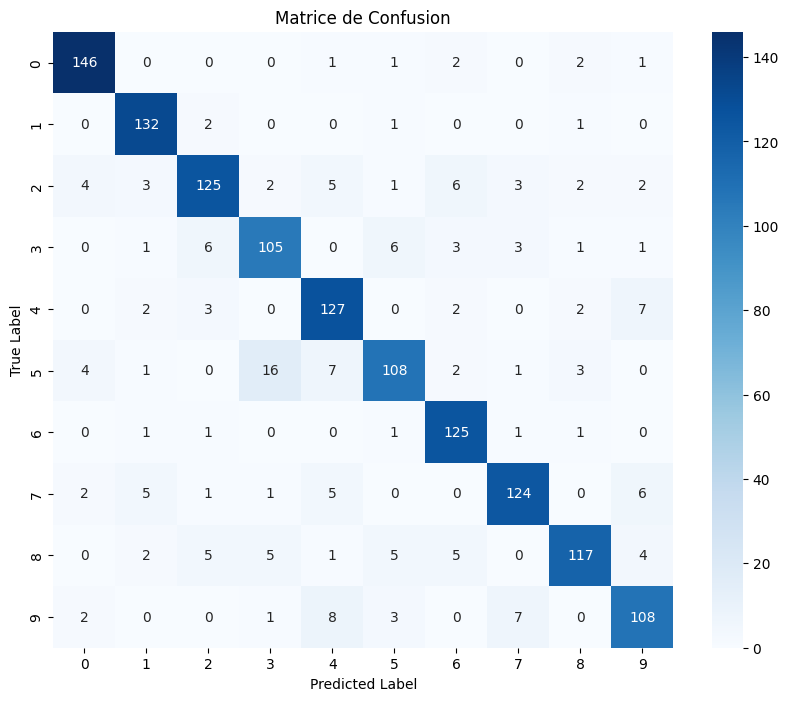

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion')
plt.show()


In [156]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [0.001, 0.01, 0.1, 1],  
    'kernel': ['rbf']
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,  
    verbose=1,
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_predm = best_model.predict(X)
print(classification_report(y, y_predm))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Meilleurs paramètres trouvés : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Meilleure précision : 0.9551784409957417
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6903
           1       0.00      0.00      0.00      7877
           2       0.00      0.00      0.00      6990
           3       0.00      0.00      0.00      7141
           4       0.00      0.00      0.00      6824
           5       0.00      0.00      0.00      6313
           6       0.00      0.00      0.00      6876
           7       0.00      0.00      0.00      7293
           8       0.10      1.00      0.18      6825
           9       0.00      0.00      0.00      6958

    accuracy                           0.10     70000
   macro avg       0.01      0.10      0.02     70000
weighted avg       0.01      0.10      0.02     70000



/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

In [ ]:
for i, model in enumerate(svm_models):
    
    support_vectors = model.support_vectors_
    dual_coefficients = model.dual_coef_
    intercept = model.intercept_
    
    print(f"Classe {i} :")
    print(f" - Nombre de vecteurs supports : {support_vectors.shape[0]}")
    print(f" - Dual coefficients (shape): {dual_coefficients.shape}")
    print(f" - Biais : {intercept[0]}")
    print("===================================")

Classe 0 :
 - Nombre de vecteurs supports : 539
 - Dual coefficients (shape): (1, 539)
 - Biais : -1.7424263530719437
Classe 1 :
 - Nombre de vecteurs supports : 598
 - Dual coefficients (shape): (1, 598)
 - Biais : -3.722068534583427
Classe 2 :
 - Nombre de vecteurs supports : 818
 - Dual coefficients (shape): (1, 818)
 - Biais : -1.4396847272782807
Classe 3 :
 - Nombre de vecteurs supports : 867
 - Dual coefficients (shape): (1, 867)
 - Biais : -1.6452911986648335
Classe 4 :
 - Nombre de vecteurs supports : 875
 - Dual coefficients (shape): (1, 875)
 - Biais : -2.8547883648343264
Classe 5 :
 - Nombre de vecteurs supports : 1086
 - Dual coefficients (shape): (1, 1086)
 - Biais : -1.8076244022987566
Classe 6 :
 - Nombre de vecteurs supports : 667
 - Dual coefficients (shape): (1, 667)
 - Biais : -2.001104315235938
Classe 7 :
 - Nombre de vecteurs supports : 710
 - Dual coefficients (shape): (1, 710)
 - Biais : -2.117064067804759
Classe 8 :
 - Nombre de vecteurs supports : 976
 - Dual c


## exportation des fichiers des paramètres

In [159]:
for i, model in enumerate(svm_models):
    
    support_vectors= model.support_vectors_
    np.savetxt(f"data/vecteur_support_{i}.txt", support_vectors, fmt="%.6f")

    dual_coefficients= model.dual_coef_
    np.savetxt(f"data/coefficients_{i}.txt", dual_coefficients, fmt="%.6f")
    
    intercept= model.intercept_[0]
    with open(f"data/biais_{i}.txt", "w") as f:
        f.write(f"{intercept:.6f}")
    print(f"Extraction terminée. Les fichier {i} ont été sauvegardés dans le dossier '/data'.")

Extraction terminée. Les fichier 0 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 1 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 2 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 3 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 4 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 5 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 6 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 7 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 8 ont été sauvegardés dans le dossier '/data'.
Extraction terminée. Les fichier 9 ont été sauvegardés dans le dossier '/data'.


# Test unitaire

## Test sur des images aléatoires de Mnist

In [161]:
random_index = np.random.randint(0, len(X_test))
test_vector = X_test[random_index].reshape(1, -1) 
true_label = y_test[random_index]

predicted_label = predict_ova(svm_models, test_vector)[0]

true_label, predicted_label
print(f"Le vrai label est : {true_label}")
print(f"Le label prédit est : {predicted_label}")
print("le vecteur de test est : ",test_vector)
print(f"Le modèle a prédit le chiffre {predicted_label} avec une précision de {accuracy * 100:.2f}%.")

Le vrai label est : 8
Le label prédit est : 8
le vecteur de test est :  [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
  1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Test sur une image réelle

### fonctions utiles pour les tests

In [163]:
def string_to_vector(input_string):
    """
    Transforme une chaîne de caractères contenant des nombres séparés par des espaces en un vecteur Python.

    :param input_string: str, chaîne de caractères avec des nombres séparés par des espaces
    :return: list, vecteur Python contenant les nombres
    """
    string_values = input_string.split()
    vector = [int(value) for value in string_values]
    return vector

def test_binarized_vector(image_vector, svm_models):
    """
    Teste un vecteur binarisé sur les modèles SVM entraînés.

    :param image_vector: list or np.array, vecteur d'une image binarisée (longueur 784 pour MNIST).
    :param svm_models: list, modèles SVM entraînés en One-vs-All.
    :return: int, la classe prédite par le modèle.
    """
    image_vector = np.array(image_vector).reshape(1, -1)
    predicted_label = predict_ova(svm_models, image_vector)[0]

    return predicted_label

In [169]:
# le chiffre 1
chiffre1 = string_to_vector("0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0")

real_image_vector = np.array(chiffre1).reshape(1, -1) 

predicted_label = predict_ova(svm_models, real_image_vector)[0]
print(f"L'image test est prédite comme étant le chiffre : {predicted_label}")

L'image test est prédite comme étant le chiffre : 1


In [183]:
# le chiffre 0
chiffre0 = string_to_vector("0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0")

real_image_vector = np.array(chiffre0).reshape(1, -1) 

predicted_label = predict_ova(svm_models, real_image_vector)
print(f"L'image test est prédite comme étant le chiffre : {predicted_label}")

L'image test est prédite comme étant le chiffre : [4]


In [170]:
#chiffre 9
chiffre9 = string_to_vector("0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0")

real_image_vector = np.array(chiffre9).reshape(1, -1) 

predicted_label = predict_ova(svm_models, real_image_vector)[0]
print(f"L'image test est prédite comme étant le chiffre : {predicted_label}")

L'image test est prédite comme étant le chiffre : 9


In [171]:
#chiffre 3
chiffre3 = string_to_vector("0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0")

real_image_vector = np.array(chiffre3).reshape(1, -1) 

predicted_label = predict_ova(svm_models, real_image_vector)[0]
print(f"L'image test est prédite comme étant le chiffre : {predicted_label}")

L'image test est prédite comme étant le chiffre : 7
